# L02: Exploring Deep Learning Tools A No-Code Introduction to TensorFlow and Keras

**by Hisham D Macaraya**

January 29, 2025

## Introduction
This lab is designed to introduce you to the basics of deep learning by interacting with a pre-built model. You'll understand the workflow of a deep learning project, including data preprocessing, model architecture, and making predictions. The goal is to familiarize yourself with the basics of deep learning without writing any code.


In [1]:
#Installation of necessary libraries

!pip install tensorflow
!pip install matplotlib
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\hisha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\hisha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\hisha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
lab

In [2]:
# Import necessary libraries
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import io
import ipywidgets as widgets


In [3]:
# Load the VGG16 model
model = VGG16(weights='imagenet')

# Display the model architecture
model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

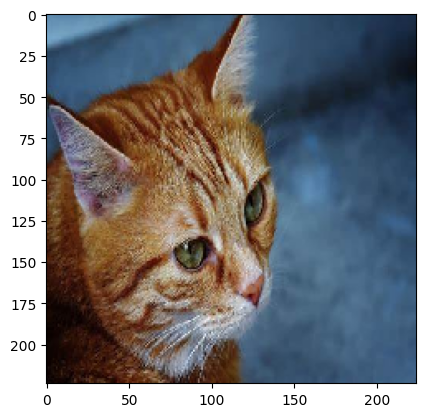

In [4]:
# Load and preprocess an image
def load_and_preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Expand dimensions to fit the model input
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image
    img_array = preprocess_input(img_array)

    return img, img_array

# Load and preprocess a sample image
sample_image, processed_image = load_and_preprocess_image('sample.jpg')

# Display the sample image
plt.imshow(sample_image)
plt.show()


In [5]:
# Make predictions
predictions = model.predict(processed_image)

# Decode and print the predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]
print(decoded_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
[('n02124075', 'Egyptian_cat', 0.39633194), ('n02123159', 'tiger_cat', 0.32532084), ('n02123045', 'tabby', 0.19731952)]


In [6]:
# Upload button to load images
upload = widgets.FileUpload()
display(upload)

# Button to make predictions
predict_button = widgets.Button(description="Make Prediction")
display(predict_button)

# Function to handle button click
def on_click(change):
    img_data = list(upload.value.values())[0]['content']
    img = Image.open(io.BytesIO(img_data))
    img = img.resize((224, 224))
    
    # Preprocess and predict
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    
    # Display predictions
    print(decoded_predictions)

predict_button.on_click(on_click)


FileUpload(value=(), description='Upload')

Button(description='Make Prediction', style=ButtonStyle())

## Conclusion and Discussion

Reflecting on our lab activities, I realized how pre-trained models, such as VGG16, make predictions by leveraging knowledge from vast datasets like ImageNet. These models have already learned to recognize various patterns and features during their extensive training, enabling them to classify new images based on this prior learning.

The role of data preprocessing became evident as a critical step to ensure consistency and performance. By resizing images to the expected dimensions (224x224 pixels) and normalizing pixel values, we align the input with the model's expectations, leading to accurate predictions. Additionally, expanding dimensions and converting images into NumPy arrays ensured that the data fits seamlessly into the model's input structure.

Reflecting on the impact of input modifications, I noticed how changes could affect predictions. For example, providing images of incorrect size or poor quality can diminish prediction accuracy, as the model relies on clear and consistent features. Proper preprocessing helps maintain the integrity of the input data, ensuring reliable results.

Through this exercise, I deepened my understanding of the intricate relationship between data preparation and model performance. This reflection highlights the importance of careful preprocessing and thoughtful input management in achieving successful predictions with machine learning models.


## End of Lab